<a href="https://colab.research.google.com/github/IbrahimTGhanem/Datathon5/blob/main/Datahon_5_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Predicting Activity using Mobile health Data**

## **Section 1: Introduction**

**1.1: Importing Libraries and exploring data**

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.utils import resample

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Upload Options
user_choice = input("Specify user (I, J, K): ")

if user_choice == 'I':
    # Option I: Mount Google Drive - Ibrahim
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("drive/My Drive/Colab Notebooks/ML 2023/Datathons/Datathon_5/mhealth.csv") #Ibrahim path File

if user_choice == 'J':
    # Option J: Mount Google Drive - Jack
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("drive/My Drive/Colab Notebooks/ML 2023/Datathons/Datathon_5/mhealth.csv") #Jack path File

if user_choice == 'K':
    # Option I: Mount Google Drive - Kaira
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("drive/My Drive/Colab Notebooks/ML 2023/Datathons/Datathon_5/mhealth.csv") #Kaira path File
else:
    print("Invalid choice. Please specify user (I, J, K) and try again.")

print(data.shape)

Specify user (I, J, K): I
Mounted at /content/drive
Invalid choice. Please specify user (I, J, K) and try again.
(999999, 14)


In [ ]:
''''from google.colab import files

# Specify the path to the file on local machine
uploaded = files.upload()'''

'from google.colab import files\n\n# Specify the path to the file on local machine\nuploaded = files.upload()'

In [3]:
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
description = data.describe()
description

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,1.702181
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,3.250841
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,2.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,12.000000


## **Section 2: Exploratory Data Analysis**

**2.1 : Exploring missing values**

In [5]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


**2.2 Visualizing and Exploring Activity by subjects (volunteers)**

In [ ]:
# Defining activity labels
activity_mapping = {
    0: 'Nothing',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'
}

# Creating a new column 'Activity_Label' with updated labels
data['Activity_Label'] = data['Activity'].map(activity_mapping)

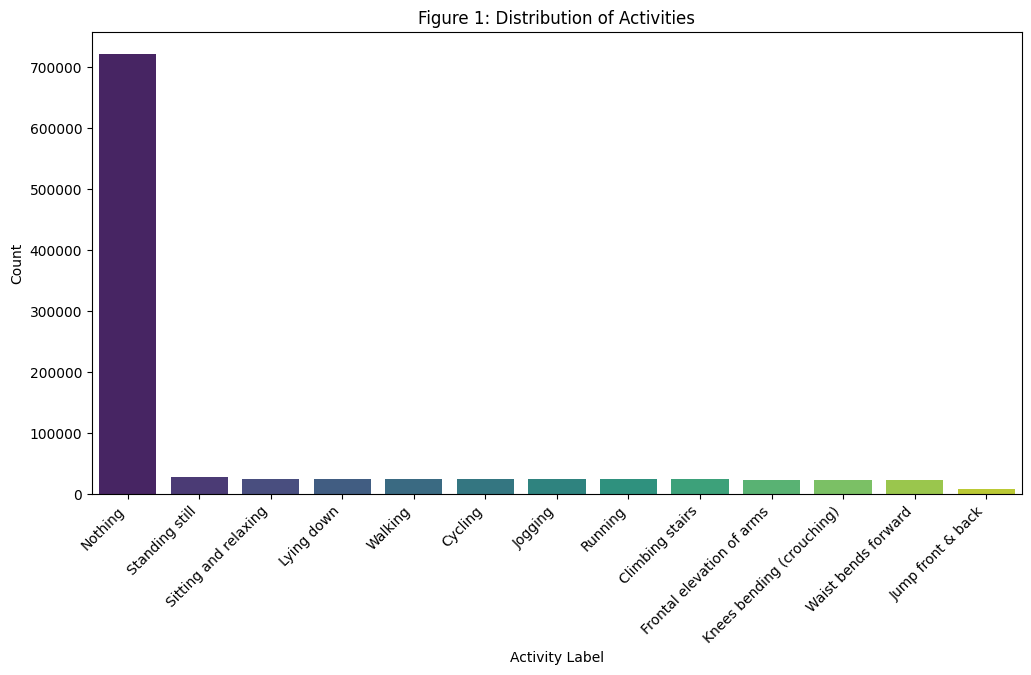

In [ ]:
# Counting the occurrences of each activity label
activity_counts = data['Activity_Label'].value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')
plt.title('Figure 1: Distribution of Activities')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

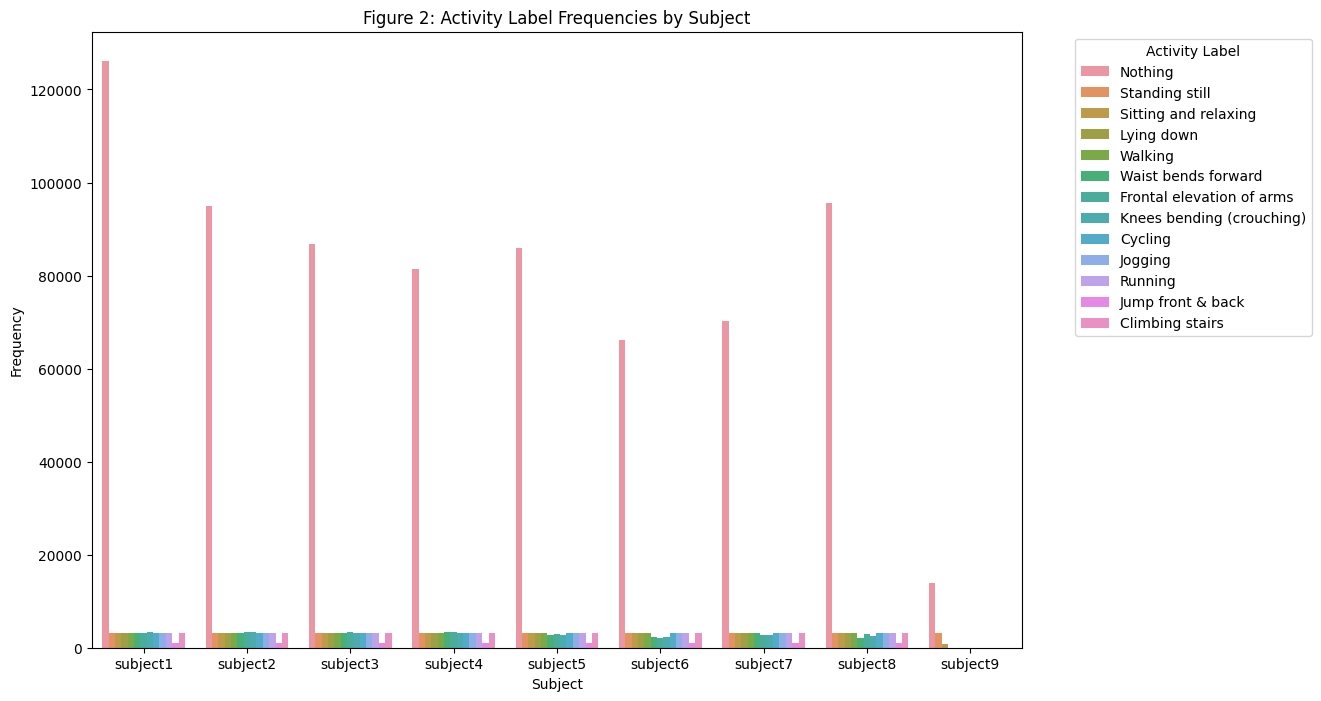

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='subject', hue='Activity_Label', data=data)
plt.title('Figure 2: Activity Label Frequencies by Subject')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.legend(title='Activity Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**2.3 Visualizing and Exploring sensors data by Activity subjects (volunteers)**

In [6]:
# Select numeric columns
numeric_columns = [
    'alx', 'aly', 'alz',
    'glx', 'gly', 'glz',
    'arx', 'ary', 'arz',
    'grx', 'gry', 'grz'
]

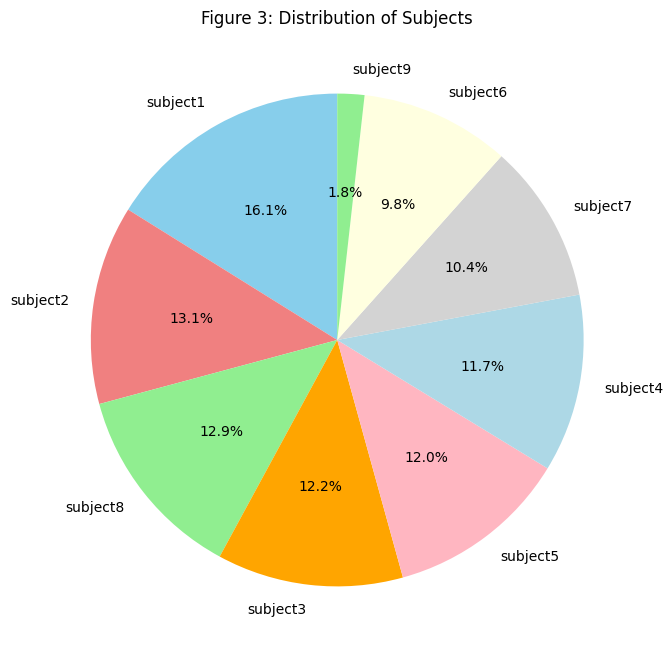

In [ ]:
subject_distribution = data['subject'].value_counts()

# Plotting a pie chart for the distribution of subjects
plt.figure(figsize=(8, 8))
subject_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightblue', 'lightgray', 'lightyellow', 'lightgreen', 'lightcoral', 'lightblue', 'skyblue'])
plt.title('Figure 3: Distribution of Subjects')
plt.ylabel('')  # Remove the default ylabel
plt.show()

In [ ]:
# Grouping by 'subject' and calculating the mean for each numeric column
mean_scores_by_subject = data.groupby('subject')[numeric_columns].mean()

# Displaying the mean scores
print("Mean Scores by Subject:")
print(mean_scores_by_subject)

Mean Scores by Subject:
               alx       aly       alz       glx       gly       glz  \
subject                                                                
subject1  1.229914 -9.667029 -1.650613  0.010649 -0.663745 -0.123458   
subject2  1.203538 -9.673908 -1.947817 -0.145236 -0.664777 -0.253973   
subject3  1.008831 -9.682334 -0.838356 -0.094419 -0.600808 -0.127118   
subject4  0.955263 -9.141956 -0.915775 -0.234392 -0.567048 -0.274444   
subject5  1.516916 -9.930505 -0.979324 -0.090689 -0.645402 -0.061448   
subject6  2.831852 -9.617919  0.636321  0.085483 -0.594557 -0.121163   
subject7  1.143347 -9.870824  0.090781  0.202386 -0.653321  0.002063   
subject8  2.242396 -9.353095 -1.444773  0.094516 -0.516886 -0.133995   
subject9  0.839933 -9.787838  0.947242  0.075409 -0.717870  0.310868   

               arx       ary       arz       grx       gry       grz  
subject                                                               
subject1 -4.178516 -4.873407  2.174713 -0

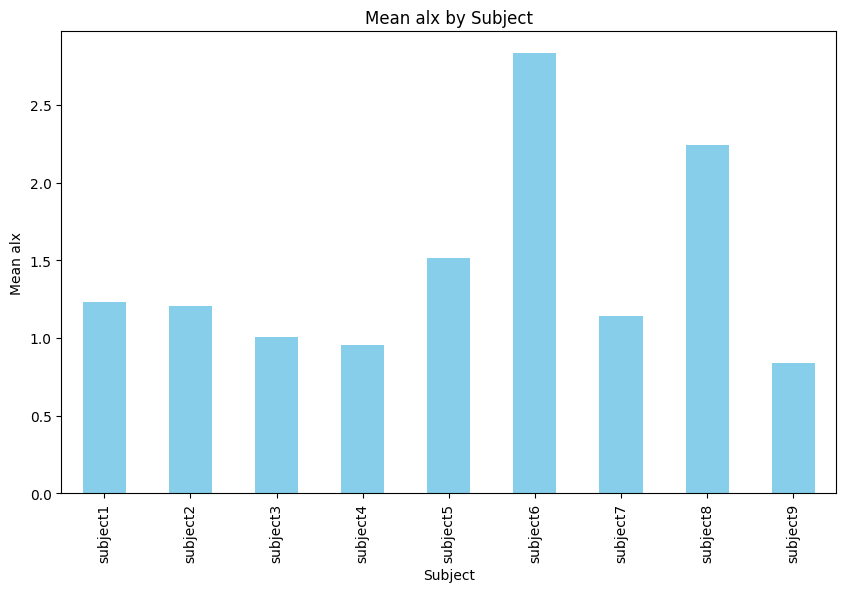

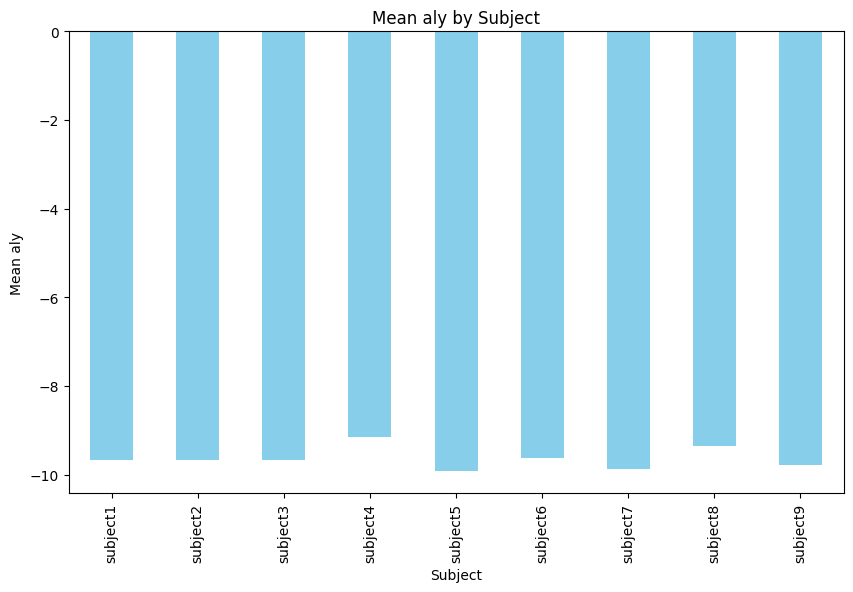

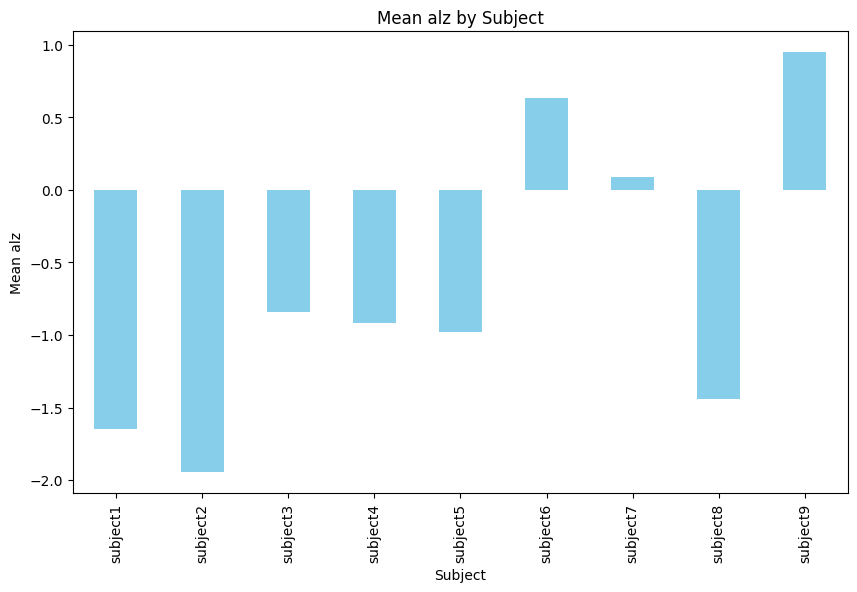

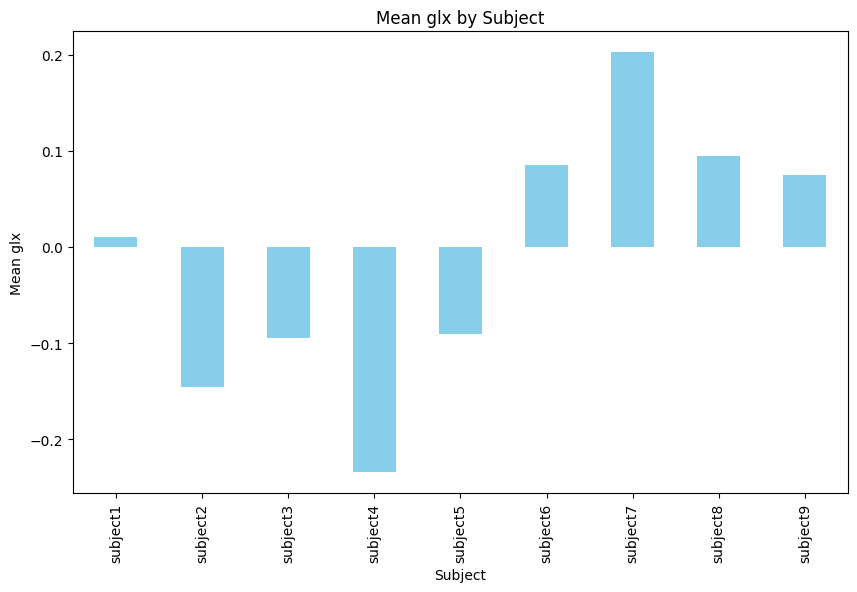

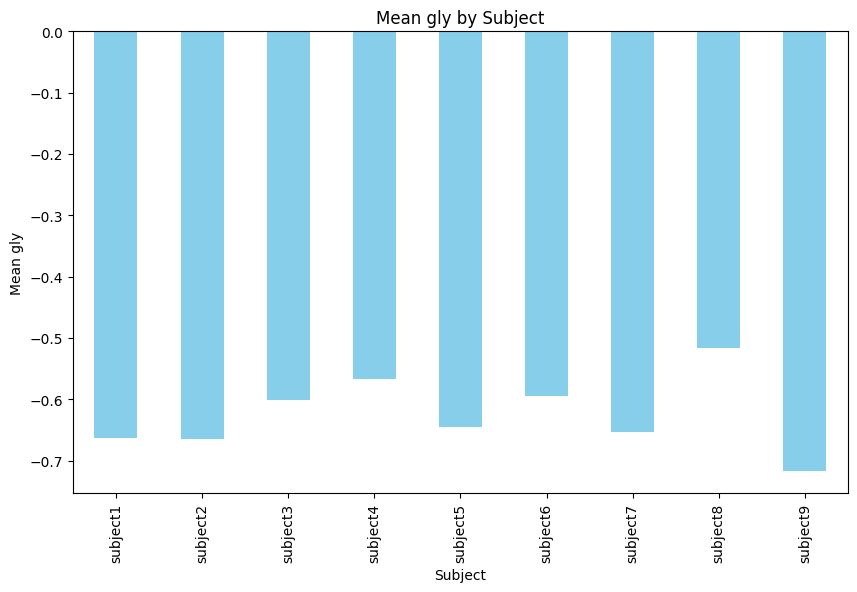

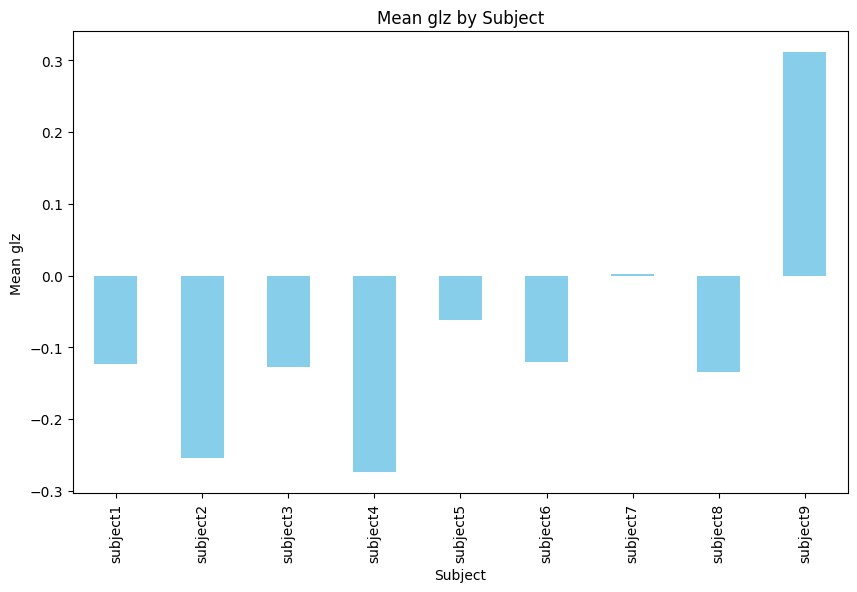

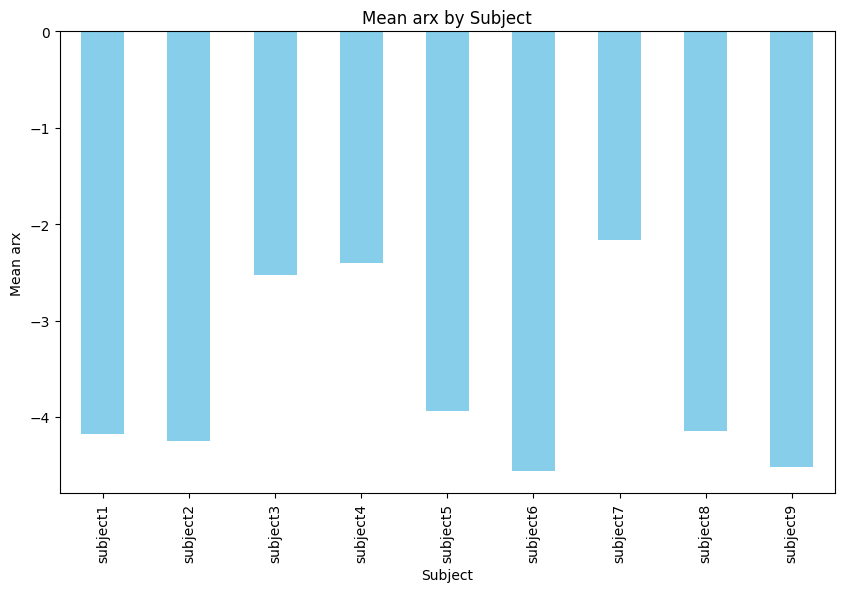

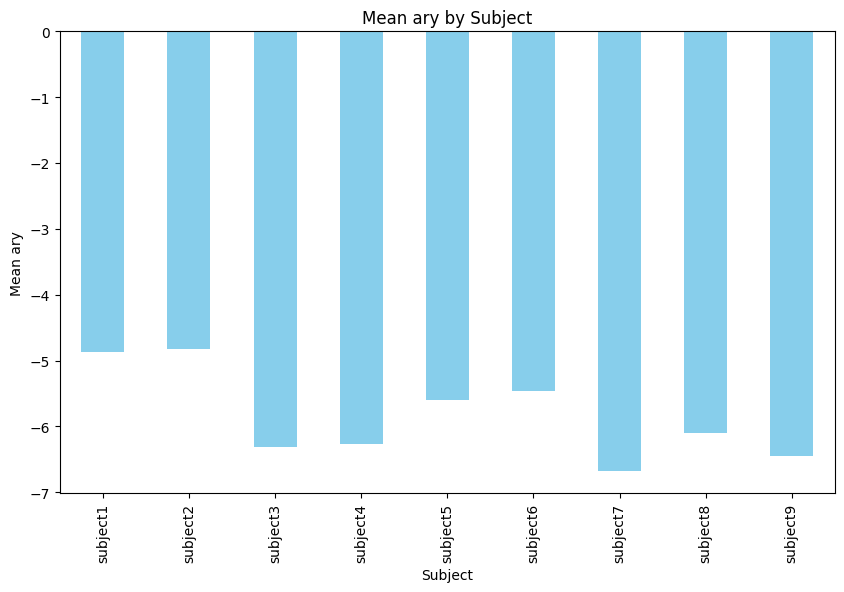

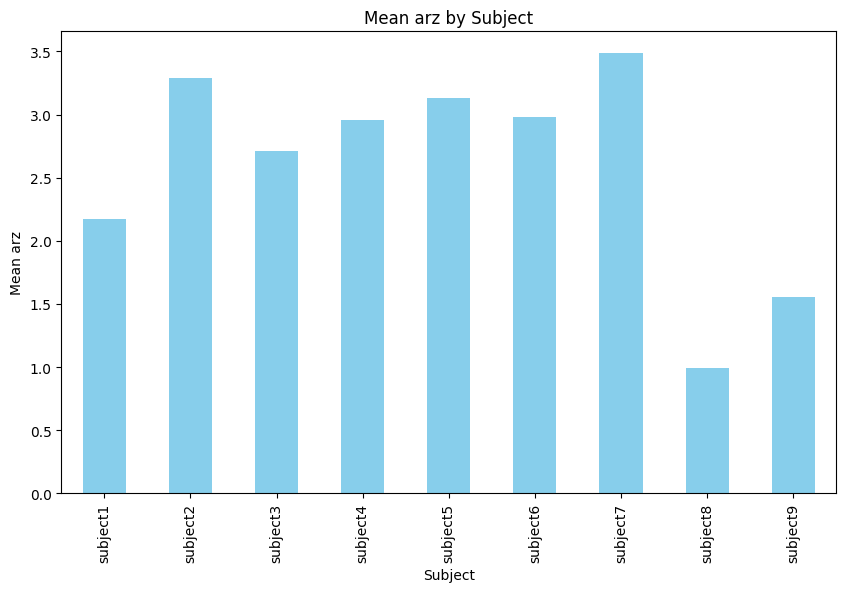

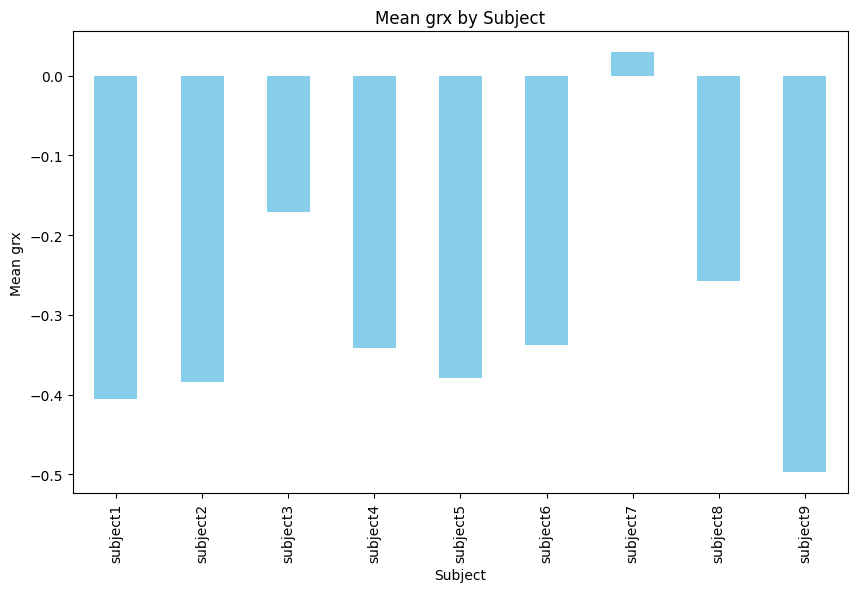

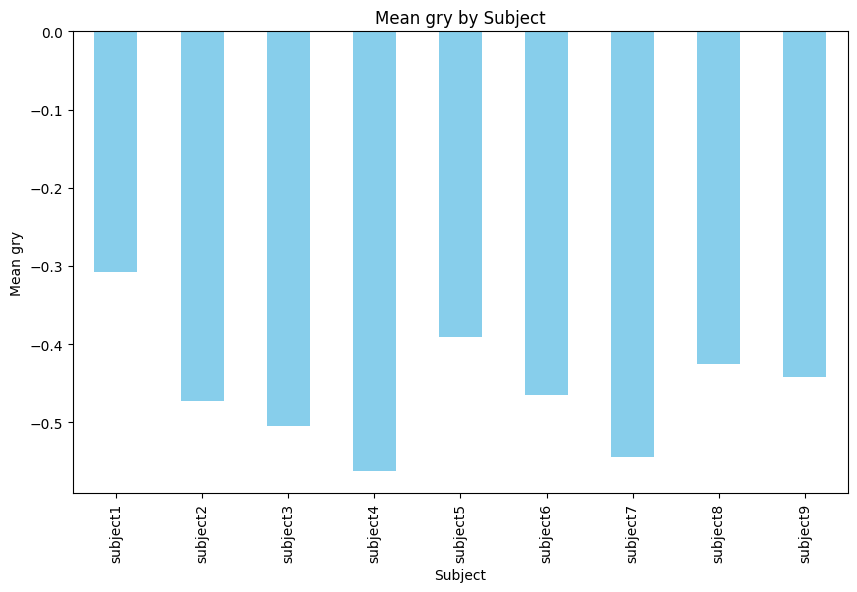

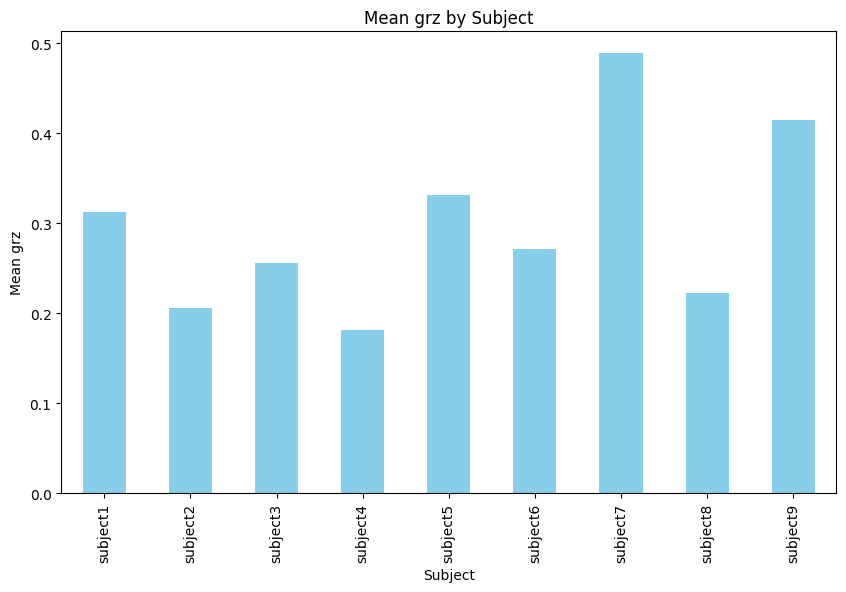

In [ ]:
mean_scores_by_subject = data.groupby('subject')[numeric_columns].mean()

# Plotting bar plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    mean_scores_by_subject[column].plot(kind='bar', color='skyblue')
    plt.title(f'Mean {column} by Subject')
    plt.xlabel('Subject')
    plt.ylabel(f'Mean {column}')
    plt.show()


In [ ]:
# Grouping by 'Activity_Label' and calculating the mean for each group
activity_means = data.groupby('Activity_Label')[numeric_columns].mean()

# Print or use the resulting DataFrame
print(activity_means)


                                alx        aly       alz       glx       gly  \
Activity_Label                                                                 
Climbing stairs            1.656781  -9.391237 -2.500030  0.167327 -0.548817   
Cycling                    0.905696  -8.946008 -3.665109  0.316216 -0.719098   
Frontal elevation of arms  1.068981  -9.645770  1.168528 -0.239209 -0.730008   
Jogging                    2.666188 -11.653374 -4.001602  0.086504 -0.510624   
Jump front & back          1.126710  -8.381838 -2.700622 -0.006277 -0.684545   
Knees bending (crouching)  1.483021  -8.278592 -3.444925 -0.148585 -0.608831   
Lying down                 3.447880  -0.113555  8.325559  0.321862  0.446112   
Nothing                    1.348343  -9.830745 -1.045179 -0.060090 -0.642341   
Running                    3.580032 -12.216917 -3.494512  0.278539 -0.640403   
Sitting and relaxing       1.977392  -8.918003 -0.006211  0.173812 -0.666531   
Standing still             0.943675  -9.

In [ ]:
# Defining the specific activity labels of interest
selected_labels = ['Nothing', 'Lying down', 'Sitting and relaxing']

# Filtering the data for the selected activity labels
selected_data = data[data['Activity_Label'].isin(selected_labels)]

# Grouping by 'Activity_Label' and calculate the mean for each group
activity_means_selected = selected_data.groupby('Activity_Label')[numeric_columns].mean()

# Printing or use the resulting DataFrame
print(activity_means_selected)


                           alx       aly       alz       glx       gly  \
Activity_Label                                                           
Lying down            3.447880 -0.113555  8.325559  0.321862  0.446112   
Nothing               1.348343 -9.830745 -1.045179 -0.060090 -0.642341   
Sitting and relaxing  1.977392 -8.918003 -0.006211  0.173812 -0.666531   

                           glz       arx       ary       arz       grx  \
Activity_Label                                                           
Lying down            0.457956 -3.475406  2.481797  6.466454  0.064637   
Nothing              -0.146180 -3.683444 -5.672417  2.720351 -0.323806   
Sitting and relaxing -0.129929 -5.847622 -4.812865  3.508846 -0.294612   

                           gry       grz  
Activity_Label                            
Lying down            0.517295  0.596896  
Nothing              -0.470841  0.248287  
Sitting and relaxing -0.216584  0.372333  


In [ ]:
data.drop('Activity_Label', axis=1, inplace=True)

**2.4 Exploring Correlation levels**

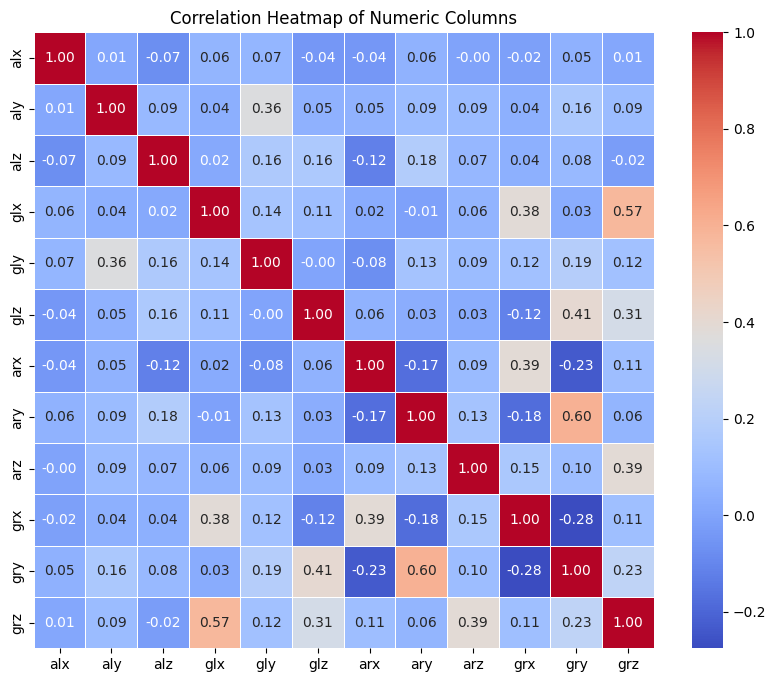

In [ ]:
# Creating a DataFrame with only the selected columns
numeric_data = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

________________________________________________________________________________

## **Section 3: Feature Engineering**

**3.1: Omitting class 0**

In [7]:
data_filtered = data[data['Activity'] != 0]

**3.2: Defining sequences, Spliting data and normalizing data  by subject**

In [13]:
#Step A: Defining Sequences
def create_sequences(data_filtered, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data_filtered) - sequence_length + 1, sequence_length):
        sequence = data_filtered[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[numeric_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)
#Step B: indetifying subjects
# Identifying unique subjects in the dataset
subjects = data_filtered['subject'].unique()

# Randomly selecting two subjects for the test set
test_subjects = random.sample(list(subjects), 2)

# Storing rest of the subjects will be in the train set
train_subjects = [subject for subject in subjects if subject not in test_subjects]

#step C: creating Train and test sets
# Creating train and test sets based on subjects
train_data = data_filtered[data_filtered['subject'].isin(train_subjects)]
test_data = data_filtered[data_filtered['subject'].isin(test_subjects)]

# Step D: Scaling data bu subjects
# Applying scaling separately for each subject in the train set
train_data_scaled = pd.DataFrame()
for subject in train_subjects:
    subject_data = train_data[train_data['subject'] == subject]
    scaler = StandardScaler()
    subject_data[numeric_columns] = scaler.fit_transform(subject_data[numeric_columns])
    train_data_scaled = pd.concat([train_data_scaled, subject_data])

# Applying scaling separately for each subject in the test set
test_data_scaled = pd.DataFrame()
for subject in test_subjects:
    subject_data = test_data[test_data['subject'] == subject]
    scaler = StandardScaler()
    subject_data[numeric_columns] = scaler.fit_transform(subject_data[numeric_columns])
    test_data_scaled = pd.concat([test_data_scaled, subject_data])

**3.3: Oversampling minority class 12 and applying Sequences**

In [14]:
# Step E: Oversampling Minority Class (Activity 12) to Match the Mean of Classes 1-11
minority_activity = 12

# Calculating mean size of classes 1-11
mean_minority_size = int(train_data_scaled[train_data_scaled['Activity'].isin(range(1, 12))].groupby('Activity').size().mean())

# Selecting minority data (Activity 12)
minority_data = train_data_scaled[train_data_scaled['Activity'] == minority_activity]

# Oversampling minority class to match the mean size of classes 1-11
oversampled_minority = resample(minority_data, replace=True, n_samples=mean_minority_size, random_state=42, stratify=minority_data['subject'])

# Combining oversampled minority class with majority classes (1-11)
oversampled_data = pd.concat([train_data_scaled[train_data_scaled['Activity'].isin(range(1, 12))], oversampled_minority])

# Applying sequences to train and test sets
X_train, y_train = create_sequences(oversampled_data, sequence_length=50)
X_test, y_test = create_sequences(test_data_scaled, sequence_length=50)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((5079, 50, 12), (5079,), (781, 50, 12), (781,))

In [15]:
print("Unique subjects in X_train:", np.unique(train_data_scaled['subject']))
print("Unique subjects in X_test:", np.unique(test_data_scaled['subject']))

Unique subjects in X_train: ['subject2' 'subject3' 'subject4' 'subject5' 'subject6' 'subject7'
 'subject8']
Unique subjects in X_test: ['subject1' 'subject9']


**3.3 Checking class counts and shapes**

In [16]:
class_counts = oversampled_data['Activity'].value_counts()
print (class_counts)

5     21504
1     21504
2     21504
3     21504
4     21504
10    21504
11    21504
9     21504
12    21164
7     20737
8     20122
6     19918
Name: Activity, dtype: int64


In [17]:
X_train.shape

(5079, 50, 12)

In [18]:
len(X_train)

5079

In [19]:
X_test.shape

(781, 50, 12)

In [20]:
X_train.shape[2]

12

_____________________________________________________________________________

## **Section 4: Output for  Oversampled data**

**Section 4.1: RNN with Pytorch for oversampled data**

In [ ]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For twelve classes
epochs = 30
learning_rate = 0.0001
batch_size = 400
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 5 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after the first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/30 ---> Train Accuracy: 25.97752808988764%, Validation Accuracy: 22.512708787218592%
Epoch 1/30 ---> Train Accuracy: 33.37078651685393%, Validation Accuracy: 33.84168482207698%
Epoch 2/30 ---> Train Accuracy: 32.943820224719104%, Validation Accuracy: 36.16557734204793%
Epoch 3/30 ---> Train Accuracy: 24.02247191011236%, Validation Accuracy: 23.529411764705884%
Epoch 4/30 ---> Train Accuracy: 24.02247191011236%, Validation Accuracy: 23.81989832970225%
Epoch 5/30 ---> Train Accuracy: 23.59550561797753%, Validation Accuracy: 22.948438634713145%
Epoch 6/30 ---> Train Accuracy: 24.51685393258427%, Validation Accuracy: 24.909222948438636%
Epoch 7/30 ---> Train Accuracy: 28.02247191011236%, Validation Accuracy: 29.04865649963689%
Epoch 8/30 ---> Train Accuracy: 32.943820224719104%, Validation Accuracy: 31.663035584604213%
Epoch 9/30 ---> Train Accuracy: 38.29213483146067%, Validation Accuracy: 35.65722585330428%
Epoch 10/30 ---> Train Accuracy: 38.674157303370784%, Validation Accuracy

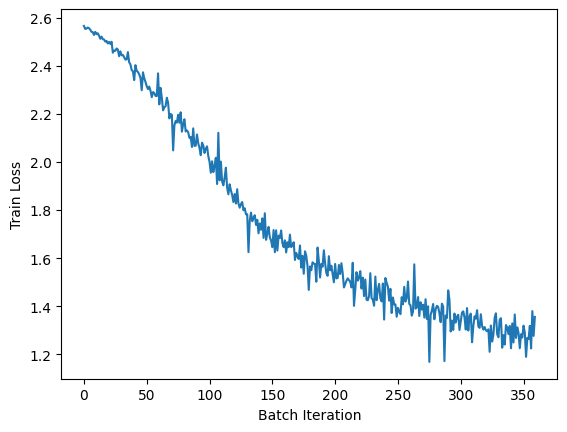

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

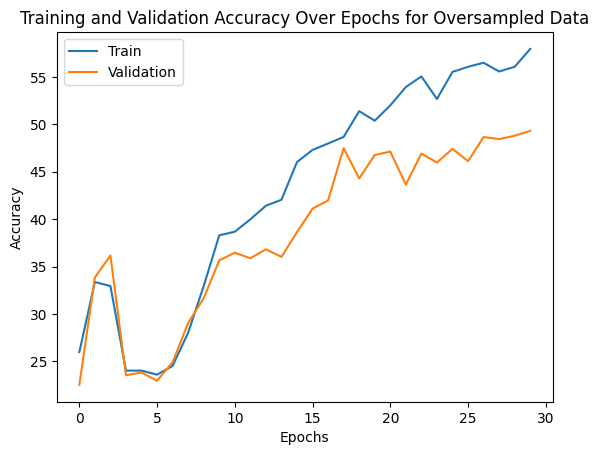

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for Oversampled Data')
plt.show()


**Section 4.2: LSTM with Pytorch for oversampled data**

In [22]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For twelve classifications
epochs = 15
learning_rate = 0.002
batch_size = 400
landa = 0.001  # Regularization term (lambda)


# Data preparation
train_dataset_LTSM = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader_LTSM = DataLoader(train_dataset_LTSM, batch_size=batch_size, shuffle=True)

test_dataset_LTSM = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader_LTSM = DataLoader(test_dataset_LTSM, batch_size=batch_size, shuffle=False)


# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 5 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader_LTSM:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader_LTSM:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader_LTSM:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/15 ---> Train Accuracy: 41.760189013585354%, Validation Accuracy: 34.05889884763124%
Epoch 1/15 ---> Train Accuracy: 64.2843079346328%, Validation Accuracy: 39.69270166453265%
Epoch 2/15 ---> Train Accuracy: 77.84997046662728%, Validation Accuracy: 53.26504481434059%
Epoch 3/15 ---> Train Accuracy: 77.16085843670014%, Validation Accuracy: 52.752880921895006%
Epoch 4/15 ---> Train Accuracy: 83.12659972435519%, Validation Accuracy: 47.75928297055058%
Epoch 5/15 ---> Train Accuracy: 77.61370348493799%, Validation Accuracy: 40.58898847631242%
Epoch 6/15 ---> Train Accuracy: 85.94211458948612%, Validation Accuracy: 42.38156209987196%
Epoch 7/15 ---> Train Accuracy: 87.85193935814137%, Validation Accuracy: 48.52752880921895%
Epoch 8/15 ---> Train Accuracy: 87.22189407363655%, Validation Accuracy: 45.96670934699104%
Epoch 9/15 ---> Train Accuracy: 90.60838747784997%, Validation Accuracy: 49.807938540332906%
Epoch 10/15 ---> Train Accuracy: 87.43847214018507%, Validation Accuracy: 54.8

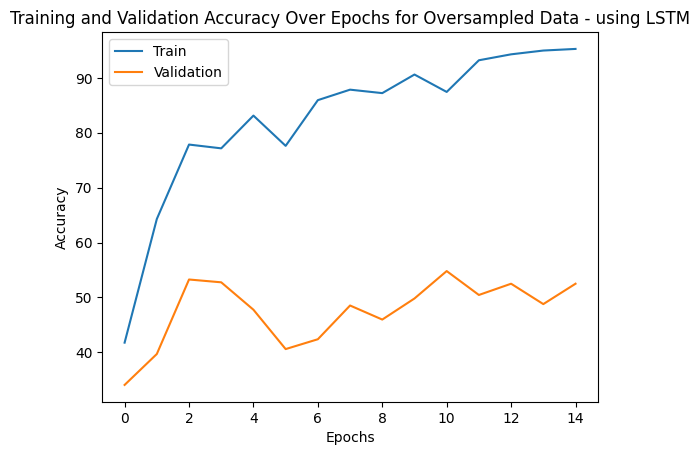

In [23]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for Oversampled Data - using LSTM')
plt.show()

________________________________________________________________________________

## **Section 5: Output for Original Data**

**Section 5.1: RNN with Pytorch for original data**

In [24]:
# Re-applying the sequence creation function to training and test sets
X_train_original, y_train_original = create_sequences (train_data_scaled, sequence_length=50)
X_test_original, y_test_original = create_sequences (test_data_scaled, sequence_length=50)

X_train_original.shape, y_train_original.shape, X_test_original.shape, y_test_original.shape

((4799, 50, 12), (4799,), (781, 50, 12), (781,))

In [11]:
# Hyperparameters
input_size = X_train_original.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For twelve classes
epochs = 40
learning_rate = 0.0001
batch_size = 400
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset_original = TensorDataset(t.tensor(X_train_original, dtype=t.float32), t.tensor(y_train_original, dtype=t.long))
train_data_loader_original = DataLoader(train_dataset_original, batch_size=batch_size, shuffle=True)

test_dataset_original = TensorDataset(t.tensor(X_test_original, dtype=t.float32), t.tensor(y_test_original, dtype=t.long))
test_data_loader_original = DataLoader(test_dataset_original, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list_original = []
validation_accuracy_list_original = []
train_loss_list_original = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader_original:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after the first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader_original:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader_original:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list_original.append(train_accuracy)
        validation_accuracy_list_original.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list_original.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/40 ---> Train Accuracy: 23.183888755694078%, Validation Accuracy: 26.80851063829787%
Epoch 1/40 ---> Train Accuracy: 31.407336370175017%, Validation Accuracy: 37.87234042553192%
Epoch 2/40 ---> Train Accuracy: 35.29129705106689%, Validation Accuracy: 38.156028368794324%
Epoch 3/40 ---> Train Accuracy: 35.77079836969552%, Validation Accuracy: 38.36879432624114%
Epoch 4/40 ---> Train Accuracy: 37.42507791896428%, Validation Accuracy: 38.723404255319146%
Epoch 5/40 ---> Train Accuracy: 33.900743227043876%, Validation Accuracy: 37.659574468085104%
Epoch 6/40 ---> Train Accuracy: 37.56892831455286%, Validation Accuracy: 37.4468085106383%
Epoch 7/40 ---> Train Accuracy: 38.863581874850155%, Validation Accuracy: 39.219858156028366%
Epoch 8/40 ---> Train Accuracy: 40.613761687844644%, Validation Accuracy: 43.61702127659574%
Epoch 9/40 ---> Train Accuracy: 38.57588108367298%, Validation Accuracy: 41.773049645390074%
Epoch 10/40 ---> Train Accuracy: 43.4907695996164%, Validation Accuracy

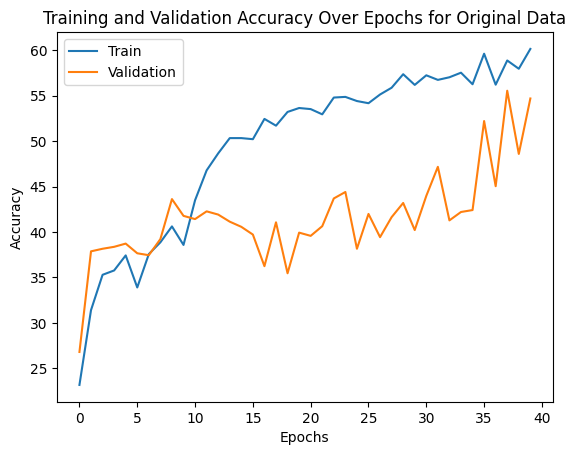

In [12]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list_original))], train_accuracy_list_original, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list_original))], validation_accuracy_list_original, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for Original Data')
plt.show()


**Section 5.2: LSTM with Pytorch for original data**

In [26]:
# Hyperparameters
input_size = X_train_original.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For twelve classifications
epochs = 40
learning_rate = 0.002
batch_size = 400
landa = 0.001  # Regularization term (lambda)


# Data preparation
train_dataset_LTSM_original = TensorDataset(t.tensor(X_train_original, dtype=t.float32), t.tensor(y_train_original, dtype=t.long))
train_data_loader_LTSM_original = DataLoader(train_dataset_LTSM_original, batch_size=batch_size, shuffle=True)

test_dataset_LTSM_original = TensorDataset(t.tensor(X_test_original, dtype=t.float32), t.tensor(y_test_original, dtype=t.long))
test_data_loader_LTSM_original = DataLoader(test_dataset_LTSM_original, batch_size=batch_size, shuffle=False)


# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader_LTSM_original:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader_LTSM_original:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader_LTSM_original:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/40 ---> Train Accuracy: 51.406543029797874%, Validation Accuracy: 31.11395646606914%
Epoch 1/40 ---> Train Accuracy: 63.47155657428631%, Validation Accuracy: 42.25352112676056%
Epoch 2/40 ---> Train Accuracy: 68.38924775995%, Validation Accuracy: 51.47247119078105%
Epoch 3/40 ---> Train Accuracy: 74.45301104396749%, Validation Accuracy: 47.247119078104994%
Epoch 4/40 ---> Train Accuracy: 80.16253386122109%, Validation Accuracy: 40.58898847631242%
Epoch 5/40 ---> Train Accuracy: 72.1191914982288%, Validation Accuracy: 45.710627400768246%
Epoch 6/40 ---> Train Accuracy: 80.72515107314024%, Validation Accuracy: 46.22279129321383%
Epoch 7/40 ---> Train Accuracy: 85.16357574494687%, Validation Accuracy: 47.75928297055058%
Epoch 8/40 ---> Train Accuracy: 86.97645342779745%, Validation Accuracy: 50.70422535211268%
Epoch 9/40 ---> Train Accuracy: 91.06063763284017%, Validation Accuracy: 52.8809218950064%
Epoch 10/40 ---> Train Accuracy: 87.26818087101479%, Validation Accuracy: 54.92957

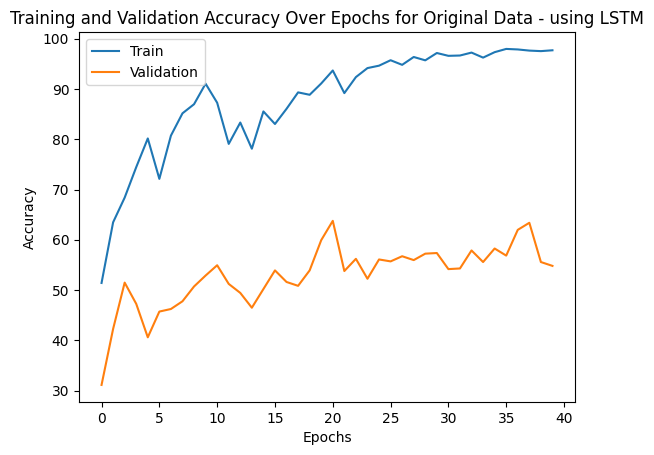

In [27]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for Original Data - using LSTM')
plt.show()

_______________________________________________________________________